### Project Description

This assignment's aim is evaluating the performance of a classification model using various metrics to understand the different evaluation techniques available and select the appropriate metrics based on the context of the problem.

The dataset used for this assignment is the Breast Cancer dataset from the file breast-cancer.csv. The dataset contains information about various factors of breast cancer cells and their diagnosis (M = malignant, B = benign).

In [9]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import yaml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#### loading data, exploratory analysis & preparing data

The first step is understanding data. It involves examining the data's structure, summary statistics, and distribution of features. Based on the result, some other prepration of data such a finding and managing missing values, outliers, or data preprocessing requirement.

(Exploratory analysis for this dataset was done before in the first and second week assignment so in the following some parts or illustrations didn't repeat.)

In [10]:
#Import the data
configPath = 'config.yaml'

# Read the yaml data from the file
with open(configPath, 'r') as file:
    configData = yaml.safe_load(file)

data = pd.read_csv(configData["breast_cancer_path"])

print(data.head(1))

       id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  842302         M        17.99         10.38           122.8     1001.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           0.1184            0.2776          0.3001               0.1471   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33            184.6      2019.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                   0.1189  

[1 rows x 32 columns]


In [11]:
#check data info
print(f'shape of data {data.shape}')
print(data.describe())
print(data.dtypes)

shape of data (569, 32)
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.01406

In [12]:
#check data for null values
print(data.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


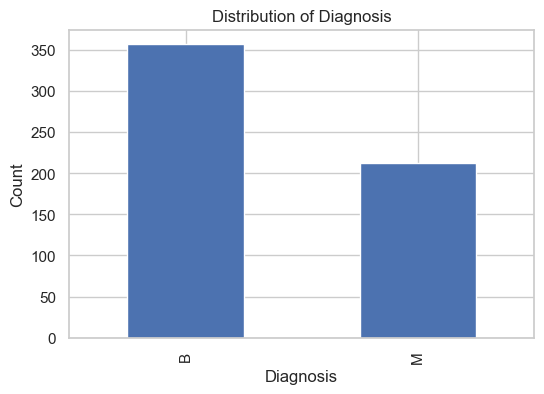

In [13]:
#plot histogram of diagnosis (diagnoses is a dependet(=target) variable)
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
data["diagnosis"].value_counts().plot(kind="bar")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.title("Distribution of Diagnosis")
plt.show()

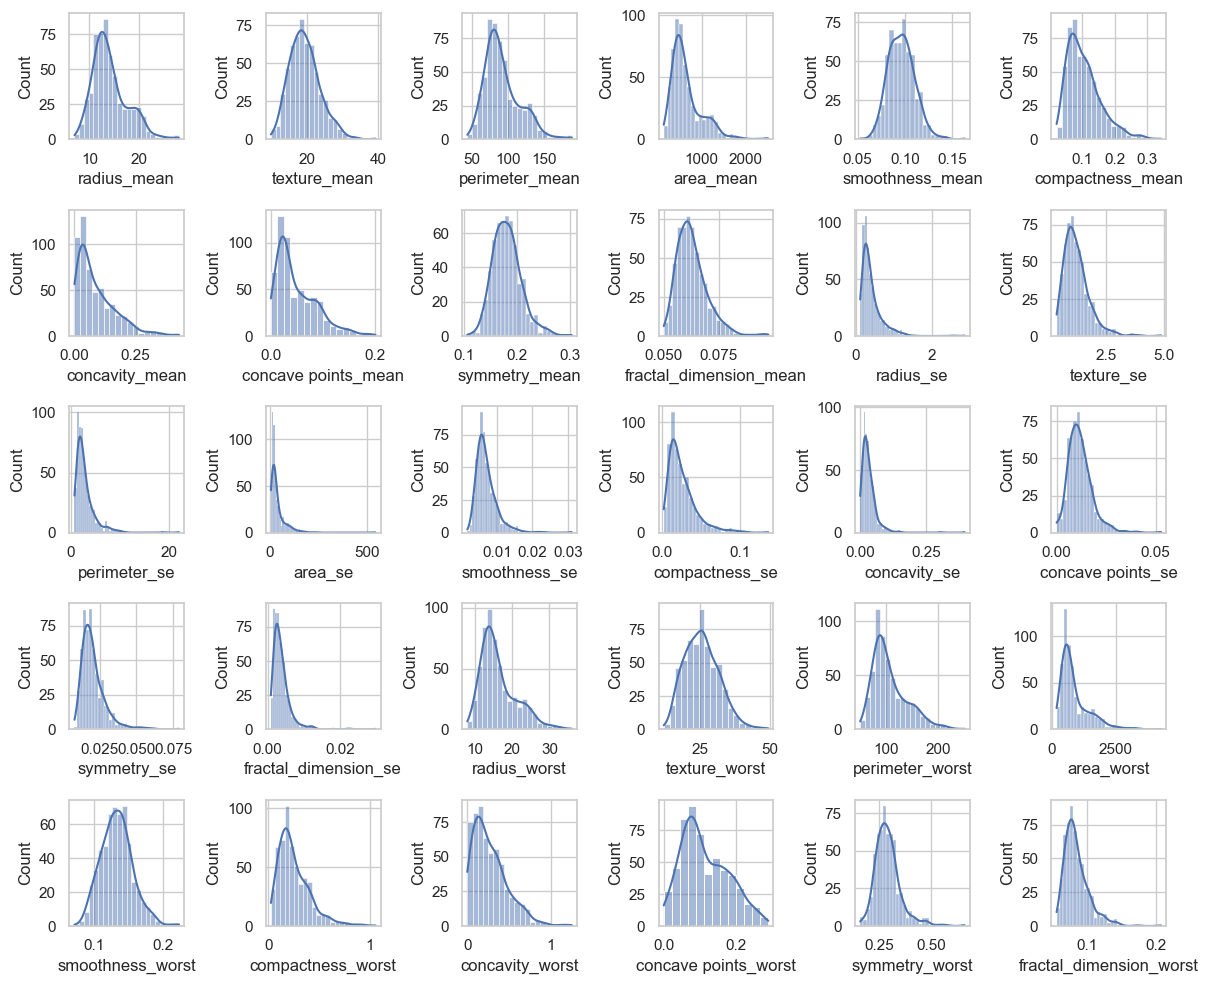

In [14]:
import seaborn as sns

# Plot histograms of each feature
sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))
for i, column in enumerate(data.columns[2:], 1):
    plt.subplot(5, 6, i)
    sns.histplot(data[column], kde=True)
    plt.xlabel(column)
plt.tight_layout()
plt.show()

Due to all above information how ever it doesn't seem that data has a null-values but regarding to std values that show spread of the data and right tail of histograms it seems that the data are not completely normalized.
Furthermore, due to histogram of "diagnoses" the values of this column is "M" and "B"

#### preprocessing data

Before modeling, the data must be preprocessed to ensure it is in a suitable format. This includes handling missing values, scaling features and splitting data into training and testing for models.

In [15]:
# separating the features (X) and the target variable (y)
X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]

# handling missing values (replace them with mean)
X = X.fillna(X.mean())

#Scaling the features (standardization)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Modeling based on Logistic Regression and SVM models

In this step, 2 classification algorithms, Logistic Regression and Support Vector Machines (SVM), are used for modeling. Different hyperparameter values are explored for each algorithm. Cross-validation technique (k-fold cross-validation) is used to assess model performance and select the best hyperparameter values.

There are some features for these models that have to be set. However, selecting these feature depends on problem and doamin knowladges but in the following some feature are tried to calculated.

In [16]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Defining the model
model = LogisticRegression()

# Defining a range of k values to try
k_values = [3, 5, 7, 10] #these values are chosen because these types of folds are common.

# Performing cross-validation and track average scores
average_scores = []

for k in k_values:
    scores = cross_val_score(model, X, y, cv=k)
    average_scores.append(scores.mean())

best_k = k_values[average_scores.index(max(average_scores))]
print("Best k value:", best_k)


Best k value: 10


As commonly K for k-fold validation is 3, 5, 7, and 10 in the above codes all are tested to find the best k. Regarding the result the 10 is the best value for it.

the hyperparameters for gamma and C for regularization svm and log-regession are assumed by [0.001, 0.01, 0.1, 1, 10, 100] to cover both low and high regularization strengths. 

The regularization parameter C in both Logistic Regression and SVM models controls the trade-off between fitting the training data well and keeping the model simple to prevent overfitting. In the previouse version just 0.1 and 1 and 10 were used, but now more values are used to get accuracy upper.

In [17]:
# Defining the models with different hyperparameter values
logreg_model = LogisticRegression()
svm_model = SVC()

C = [0.001, 0.01, 0.1, 1, 10, 100]

# Defining the hyperparameter values to try for each model
logreg_params = {'C': C}
svm_params = {'C': C, 'gamma': C}

k = 10  # Number of folds which calculated in the previouse section

# Logistic Regression
logreg_scores = []
for param in logreg_params['C']:
    logreg_model.C = param
    scores = cross_val_score(logreg_model, X, y, cv=k)
    logreg_scores.append(scores.mean())

# SVM
svm_scores = []
for param_C in svm_params['C']:
    for param_gamma in svm_params['gamma']:
        svm_model.C = param_C
        svm_model.gamma = param_gamma
        scores = cross_val_score(svm_model, X, y, cv=k)
        svm_scores.append(scores.mean())

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [18]:
# Compare and select the best model based on cross-validation scores
best_logreg_param = logreg_params['C'][logreg_scores.index(max(logreg_scores))]
best_svm_param_C, best_svm_param_gamma = svm_params['C'][svm_scores.index(max(svm_scores)) // len(svm_params['gamma'])], \
                                        svm_params['gamma'][svm_scores.index(max(svm_scores)) % len(svm_params['gamma'])]

print("Logistic Regression cross-validation scores:", logreg_scores)
print("Best Logistic Regression hyperparameter (C) value:", best_logreg_param)
print("SVM cross-validation scores:", svm_scores)
print("Best SVM hyperparameter (C, gamma) values:", best_svm_param_C, ",", best_svm_param_gamma)

Logistic Regression cross-validation scores: [0.899874686716792, 0.9525375939849624, 0.9736215538847117, 0.9824248120300751, 0.975407268170426, 0.9666666666666666]
Best Logistic Regression hyperparameter (C) value: 1
SVM cross-validation scores: [0.6274122807017544, 0.6274122807017544, 0.6274122807017544, 0.6274122807017544, 0.6274122807017544, 0.6274122807017544, 0.6274122807017544, 0.6291666666666667, 0.6274122807017544, 0.6274122807017544, 0.6274122807017544, 0.6274122807017544, 0.8208020050125313, 0.9507832080200501, 0.9262218045112782, 0.6274122807017544, 0.6274122807017544, 0.6274122807017544, 0.9507518796992482, 0.9736215538847116, 0.9560463659147869, 0.6309210526315789, 0.6274122807017544, 0.6274122807017544, 0.9753759398496239, 0.982393483709273, 0.9472744360902254, 0.6344298245614035, 0.6274122807017544, 0.6274122807017544, 0.9736215538847117, 0.9683897243107769, 0.9472744360902254, 0.6344298245614035, 0.6274122807017544, 0.6274122807017544]
Best SVM hyperparameter (C, gamma)

The cross-validation scores for logistic regression are as follows: [0.899, 0.952, 0.973, 0.982, 0.975, 0.967]. These scores indicate the performance of the logistic regression model with different values of the hyperparameter 'C'. And The best performing of that has a cross-validation score of approximately 0.9824, and the corresponding hyperparameter 'C' value was 1. This means that among the tested values of 'C', 1 resulted in the highest average performance across the cross-validation folds.

The cross-validation scores for the SVM model are varied (from 0.6274 to 0.9824). These scores represent the performance of the SVM model with different combinations of hyperparameters C and gamma. The best-performing SVM model has a cross-validation score of 0.9824. The corresponding hyperparameters were C = 10 and gamma = 0.01. This suggests that among the tested combinations of C and gamma, this particular combination led to the highest average performance.

Now in this step, it is possible to train the selected model with best hyperparameter values on the full training dataset.

In [19]:
from sklearn.metrics import accuracy_score

# Initializing the models with the best hyperparameters
best_logreg_model = LogisticRegression(C=best_logreg_param)
best_svm_model = SVC(C=best_svm_param_C, gamma=best_svm_param_gamma)

# Training the models on the full training data
best_logreg_model.fit(X, y)
best_svm_model.fit(X, y)

# Making predictions on the test set: X_test & y_test are calculated in some previouse blocks
logreg_predictions = best_logreg_model.predict(X_test)
svm_predictions = best_svm_model.predict(X_test)

#Evaluating the model performance
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print("Logistic Regression accuracy on test set:", logreg_accuracy)
print("SVM accuracy on test set:", svm_accuracy)


Logistic Regression accuracy on test set: 0.9912280701754386
SVM accuracy on test set: 0.9824561403508771


In this evaluation logistic Regression model achieved an accuracy of approximate 99.12% on the test set, while the SVM model achieved an accuracy of around 98.25%. This indicates that both models are performing well on the given breast cancer dataset. But in sensitive research such as medical contexts like breast cancer prediction accuracy alone might not be the only metric to consider. It is better to examine other metrics, as well.

#### Evaluation 

in the following some other evaluation based on classification_report, confusion_matrix, AUC ROC, and precision-recall curve are examined.

Before using functions, since dataset's dependent/target variable encoded as B and M, it is needed to convert them to binary values to prevent of errors for precision_recall_curve which need true values in binary format.

In [20]:
# Convert categorical labels to binary values

label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)

In [21]:
# Calculation for Logistic Regression

logreg_probabilities = best_logreg_model.predict_proba(X_test)[:, 1]
logreg_roc_auc = roc_auc_score(y_test, logreg_probabilities)
logreg_precision, logreg_recall, _ = precision_recall_curve(y_test_binary, logreg_probabilities)
logreg_pr_auc = auc(logreg_recall, logreg_precision)

print("Logistic Regression ROC AUC:", logreg_roc_auc)
print("Logistic Regression PR AUC:", logreg_pr_auc)

logreg_predictions = best_logreg_model.predict(X_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test, logreg_predictions))
logreg_confusion_matrix = confusion_matrix(y_test, logreg_predictions)
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, logreg_predictions))

Logistic Regression ROC AUC: 0.9980347199475925
Logistic Regression PR AUC: 0.9971226862838158
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           B       0.99      1.00      0.99        71
           M       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Logistic Regression Confusion Matrix:
 [[71  0]
 [ 1 42]]


The evaluation results for Logistic Regression models are performing well on the dataset.

ROC AUC: 0.998 as it is close to 1, so it shows excellent discrimination capability.

PR AUC: 0.997 it also close to 1 and indicats strong precision-recall trade-off.

Classification Report: The model shows high precision, recall, and F1-score for both classes.

Confusion Matrix: 0 false positive (Type I error) and 1 false negative (Type II error), which is good result.

In [22]:
# Calculation for SVM model

svm_probabilities = best_svm_model.decision_function(X_test)
svm_roc_auc = roc_auc_score(y_test, svm_probabilities)
svm_precision, svm_recall, _ = precision_recall_curve(y_test_binary, svm_probabilities)
svm_pr_auc = auc(svm_recall, svm_precision)

print("SVM ROC AUC:", svm_roc_auc)
print("SVM PR AUC:", svm_pr_auc)

svm_predictions = best_svm_model.predict(X_test)
print("SVM Classification Report:\n", classification_report(y_test, svm_predictions))
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)
print("SVM Confusion Matrix:\n", svm_confusion_matrix)

SVM ROC AUC: 0.9993449066491975
SVM PR AUC: 0.9989546629081515
SVM Classification Report:
               precision    recall  f1-score   support

           B       0.97      1.00      0.99        71
           M       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

SVM Confusion Matrix:
 [[71  0]
 [ 2 41]]


Like Logistic Regression, SVM models are performing well on the dataset.

ROC AUC: 0.999 as it is close to 1 it is very good discrimination.

PR AUC: 0.999 it shows high precision-recall balance.

Classification Report: The model has high precision, recall, and F1-score, though slightly lower for the malignant class compared to Logistic Regression.

Confusion Matrix: 0 false positives (Type I error) and 2 false negatives (Type II error), seems almost good results.

#### visualize results

In the following the above results are visualized to show better the interpretions and comparation of methods in SVM and logistic regrations.

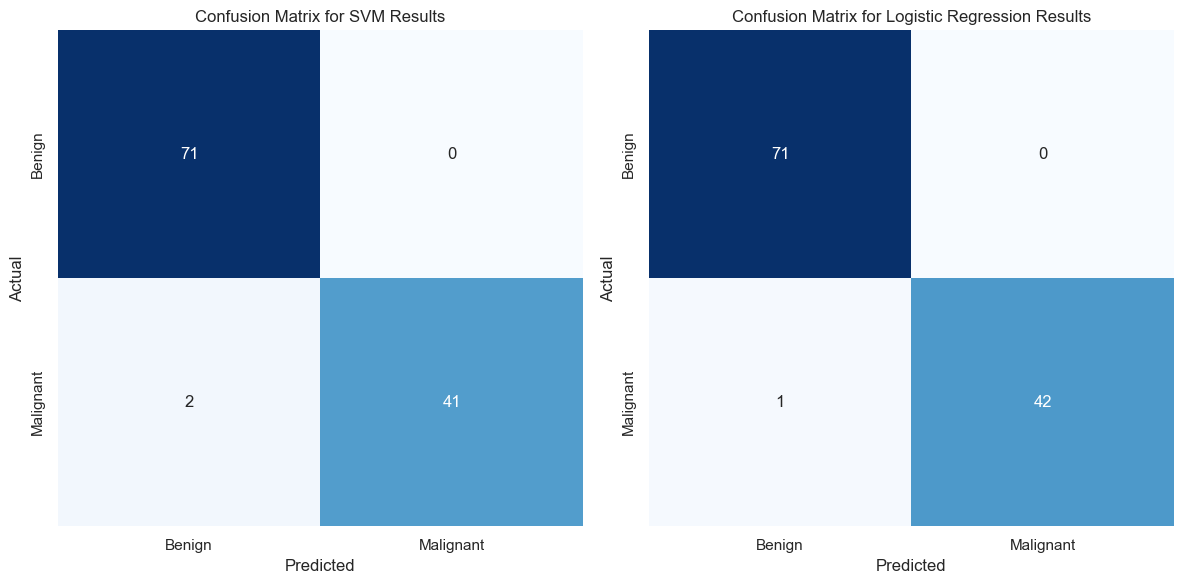

In [23]:
# ploting the result of Confusion Matrix

class_names = ['Benign', 'Malignant']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create heatmap for SVM
sns.heatmap(svm_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_title("Confusion Matrix for SVM Results")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Create heatmap for log_reg
sns.heatmap(logreg_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_names, yticklabels=class_names, ax=axes[1])
axes[1].set_title("Confusion Matrix for Logistic Regression Results")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

# Adjust layout
plt.tight_layout()
plt.show()


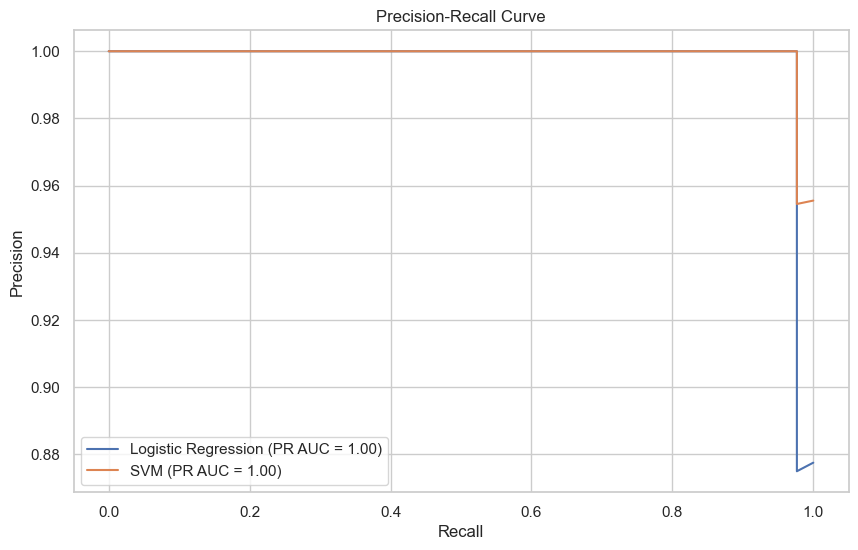

In [24]:
# ploting the result of Precision & Recall 

plt.figure(figsize=(10, 6))
plt.plot(logreg_recall, logreg_precision, label="Logistic Regression (PR AUC = {:.2f})".format(logreg_pr_auc))
plt.plot(svm_recall, svm_precision, label="SVM (PR AUC = {:.2f})".format(svm_pr_auc))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


In the above plots the results are shown again. How ever the Classification Report is not normal to plot but other methods show the same results that were interpreted in the above section. The Confusion Matrix figures show the results in the actual and predicted status (FP, FN, TP, TN) and Precision & Recall figure shows that the models work well because values almost close to 1 and the Precision-Recall Area Under the Curve (PR AUC) is equal to 1 that shows the models are making perfect predictions, both in terms of minimizing false positives (high precision) and capturing all true positive cases (high recall).